In [2]:
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [3]:
import pandas as pd
df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [16]:
from sklearn.model_selection import train_test_split 
variance = df["variance"]
Class = df["class"]

variance_train, variance_test, Class_train, Class_test = train_test_split(variance, Class, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(variance_train.ravel(), (len(variance_train), 1))
Y = np.reshape(Class_train.ravel(), (len(Class_train), 1))

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
X_test = np.reshape(variance_test.ravel(), (len(variance_test), 1))
Y_test = np.reshape(Class_test.ravel(), (len(Class_test), 1))

Class_prediction = classifier.predict(X_test)

predicted_values = []
for i in Class_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorised')]

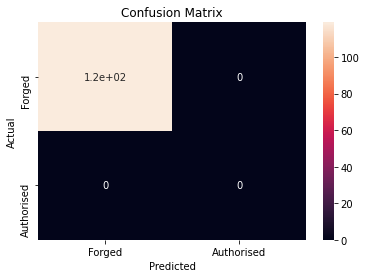

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  

labels = ["Forged", "Authorised"]
cm = confusion_matrix(actual_values, predicted_values, labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)